# 📈 Probit Regression Analysis with 95% Confidence Interval Plot

This notebook demonstrates how to perform a **probit regression** to model the probability of a positive detection based on antibody concentration. We also visualize the predicted probabilities along with their 95% confidence intervals.

---

## 📥 1. Import Libraries and Load Data

In [2]:

import pandas as pd

url = "https://raw.githubusercontent.com/WKPhang/probit-regression-plot/main/pseudodata_diagnostic_performance.csv"
df = pd.read_csv(url)
print(df.head())

   antibody_conc  positive
0            0.0         0
1            0.0         0
2            0.0         0
3            0.0         0
4            0.0         0


# 🧮 2. Fit Probit Regression Model
We use the statsmodels library to fit a probit regression model:

Predictor: antibody_conc

Response: binary variable positive (1 = positive detection, 0 = negative)

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit model
X = sm.add_constant(df['antibody_conc'])
y = df['positive']
model = sm.Probit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.404838
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               positive   No. Observations:                   48
Model:                         Probit   Df Residuals:                       46
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Aug 2025   Pseudo R-squ.:                  0.3969
Time:                        14:00:35   Log-Likelihood:                -19.432
converged:                       True   LL-Null:                       -32.222
Covariance Type:            nonrobust   LLR p-value:                 4.246e-07
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3251      0.325     -4.074      0.000      -1.963      -0.688
antibody_conc     0.

# 3. 📈 Predict Probabilities and 95% Confidence Intervals
We generate predictions across a range of antibody concentrations (0 to 10, step of 0.5) and extract:
- Predicted probabilities
- Lower and upper bounds of 95% confidence intervals

In [4]:
# Generate new values for prediction
newdf = pd.DataFrame({'antibody_conc': np.arange(0, 10.5, 0.5)})
X_new = sm.add_constant(newdf['antibody_conc'])

# Predict probabilities + get 95% confidence intervals
pred = result.get_prediction(X_new)
pred_summary = pred.summary_frame(alpha=0.05)

print(pred_summary.head())  # See actual column names



   predicted        se  ci_lower  ci_upper
0   0.092569  0.053938  0.024843  0.245871
1   0.121909  0.060494  0.039916  0.281183
2   0.157233  0.066320  0.061019  0.320780
3   0.198694  0.071384  0.088826  0.365209
4   0.246138  0.075889  0.123297  0.414990


# 4. 📊 Visualization of Predicted Probabilities with 95% CI
We plot:
- The predicted probability curve (blue line)
- The 95% confidence interval (shaded region)

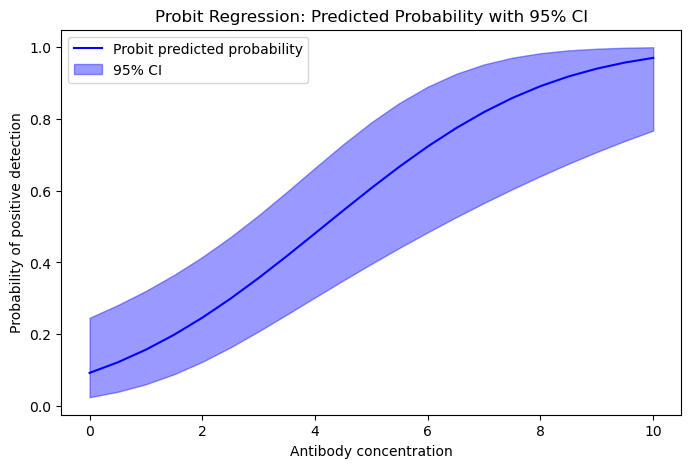

In [5]:
newdf['p'] = pred_summary['predicted']
newdf['lwr'] = pred_summary['ci_lower']
newdf['upr'] = pred_summary['ci_upper']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(newdf['antibody_conc'], newdf['p'], label='Probit predicted probability', color='blue')
plt.fill_between(newdf['antibody_conc'], newdf['lwr'], newdf['upr'], color='blue', alpha=0.4, label='95% CI')
plt.xlabel('Antibody concentration')
plt.ylabel('Probability of positive detection')
plt.legend()
plt.title('Probit Regression: Predicted Probability with 95% CI')
plt.show()
